<!-- dom:TITLE: Finite difference, linear algebra, and tridiagonal matrices  -->
# Finite difference, linear algebra, and tridiagonal matrices 
<!-- dom:AUTHOR: Prepared as part of MOD510 Computational Engineering and Modeling -->
<!-- Author: -->  
**Prepared as part of MOD510 Computational Engineering and Modeling**

Date: **Feb 25, 2020**

# Solving the stationary heat equation

Learning objectives:
1. Understand how a finite difference problem can be formulated as a

matrix inversion problem
1. See the value of using solvers that use the symmetry of the problem

2. Understand the origin of a conservation equation

<!-- --- begin exercise --- -->

## Exercise 1: Conservation Equation or the Continuity Equation

<!-- dom:FIGURE: [fig-lin/heat.png, width=700 frac=.9] Conservation of energy and the continuity equation. <div id="fig:nlin:heat"></div> -->
<!-- begin figure -->
<div id="fig:nlin:heat"></div>

<p>Conservation of energy and the continuity equation.</p>
<img src="fig-lin/heat.png" width=700>

<!-- end figure -->


In [figure](#fig:nlin:heat), the continuity equation is derived for
heat flow.
### Heat equation for solids

Derive the heat equation for a solid and show that it can be written:

<!-- Equation labels as ordinary links -->
<div id="eq:nlin:heateq"></div>

$$
\begin{equation}
\frac{d^2T}{dx^2}+\frac{\dot{\sigma}}{k}=\frac{\rho c_p}{k}\frac{dT}{dt},
\label{eq:nlin:heateq} \tag{1}
\end{equation}
$$

where $\dot{\sigma}$ is the rate of heat generation in the solid. This
equation can be used as a starting point for many inter-sting
models. In this exercise we will investigate the *steady state*
solution, *steady state* is just a fancy way of expressing that we
want the solution that *does not change with time*. This is achieved
by ignoring the derivative with respect to time in equation
([1](#eq:nlin:heateq)). We want to study a system with size $L$, and is
it good practice to introduce a dimensionless variable: $y=x/L$. 
Show that equation ([1](#eq:nlin:heateq)) now takes the following form:

<!-- Equation labels as ordinary links -->
<div id="eq:nlin:heat2"></div>

$$
\begin{equation}
\frac{d^2T }{dx^2}+\frac{\dot{\sigma}L^2}{k}=0
\label{eq:nlin:heat2} \tag{2}
\end{equation}
$$

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 2: Curing of Concrete and Matrix Formulation

Curing of concrete is one particular example that we can investigate
with equation ([2](#eq:nlin:heat2)). When concrete is curing, there are
a lot of chemical reactions happening, these reactions generate
heat. This is a known issue, and if the temperature rises too much 
compared to the surroundings, the concrete may fracture.  In the
following we will, for simplicity, assume that the rate of heat
generated during curing is constant, $\dot{\sigma}=$100 W/m$^3$. The
left end (at $x=0$) is insulated, meaning that there is no flow of
heat over that boundary, hence $dT/dx=0$ at $x=0$. On the right hand
side the temperature is kept constant, $x(L)=y(1)=T_1$, assumed to be
equal to the ambient temperature of $T_1=25^\circ$C.  The concrete
thermal conductivity is assumed to be $k=1.65$ W/m$^\circ$C.



**Part 1.**

Show that the solution to equation ([2](#eq:nlin:heat2)) in this case is:

<!-- Equation labels as ordinary links -->
<div id="eq:nlin:heatsol"></div>

$$
\begin{equation}
T(y)=\frac{\dot{\sigma}L^2}{2k}(1-y^2)+T_1.
\label{eq:nlin:heatsol} \tag{3}
\end{equation}
$$

In order to solve equation ([2](#eq:nlin:heat2)) numerically, we need to discretize
it.

**Part 2.**

Show that equation ([2](#eq:nlin:heat2)) now takes the following form:

<!-- Equation labels as ordinary links -->
<div id="eq:nlin:heat3"></div>

$$
\begin{equation}
T_{i+1}+T_{i-1}-2T_i=-h^2\beta,
\label{eq:nlin:heat3} \tag{4}
\end{equation}
$$

where $\beta=2\dot{\sigma}L^2/k$.
<!-- dom:FIGURE: [fig-lin/heat_grid.png, width=200 frac=.5] Finite difference grid for $N=4$. <div id="fig:nlin:hgrid"></div>  -->
<!-- begin figure -->
<div id="fig:nlin:hgrid"></div>

<p>Finite difference grid for $N=4$.</p>
<img src="fig-lin/heat_grid.png" width=200>

<!-- end figure -->


In [figure](#fig:nlin:hgrid), the finite difference grid is shown for
$N=4$. Let us write down equation ([4](#eq:nlin:heat3)) for each grid
node to see how the implementation is done in practice:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
T_{-1}+T_1-2T_0 =-h^2\beta,{\nonumber}
\label{_auto1} \tag{5}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}  
T_{0}+T_2-2T_1 =-h^2\beta,{\nonumber}
\label{_auto2} \tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}  
T_{1}+T_3-2T_2 =-h^2\beta,{\nonumber}
\label{_auto3} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}  
T_{2}+T_4-2T_3 =-h^2\beta.{\nonumber}
\label{_auto4} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:nlin:heat4"></div>

$$
\begin{equation}  
\label{eq:nlin:heat4} \tag{9}
\end{equation}
$$

The tricky part is now to introduce the boundary conditions. The right
hand side is easy, because here the temperature is $T_4=25$. However,
we see that $T_{-1}$ enters and we have no value for this node. The
boundary condition on the left hand side is $dT/dy=0$, by using the
central difference for the derivative allows us to write:

<!-- Equation labels as ordinary links -->
<div id="eq:nlin:bound1"></div>

$$
\begin{equation}
\left.\frac{dT}{dy}\right|_{y=0}=\frac{T_{-1}-T_1}{2h}=0,
\label{eq:nlin:bound1} \tag{10}
\end{equation}
$$

hence $T_{-1}=T_1$. Thus the final set of equations are:

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
2T_1-2T_0 =-h^2\beta,{\nonumber}
\label{_auto5} \tag{11}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}  
T_{0}+T_2-2T_1 =-h^2\beta,{\nonumber}
\label{_auto6} \tag{12}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}  
T_{1}+T_3-2T_2 =-h^2\beta,{\nonumber}
\label{_auto7} \tag{13}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}  
T_{2}+25-2T_3 =-h^2\beta,{\nonumber}
\label{_auto8} \tag{14}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="eq:nlin:heat5"></div>

$$
\begin{equation}  
\label{eq:nlin:heat5} \tag{15}
\end{equation}
$$

or in matrix form:

<!-- Equation labels as ordinary links -->
<div id="eq:lin:heats"></div>

$$
\begin{equation}
\left(
\begin{array}{cccc}
-2&2&0&0\\ 
1&-2&1&0\\ 
0&1&-2&1\\ 
0&0&1&-2\\ 
\end{array}
\right)
\left(
\begin{array}{c}
T_0\\ 
T_1\\ 
T_2\\ 
T_3\\ 
\end{array}
\right)
=
\left(
\begin{array}{c}
-h^2\beta\\ 
-h^2\beta\\ 
-h^2\beta\\ 
-h^2\beta+25\\ 
\end{array}
\right).
\end{equation}
\label{eq:lin:heats} \tag{16}
$$

Note that it is now easy to increase $N$ as it is only the boundaries
that requires special attention. The set of equations can be solved
using [`scipy.sparse.linalg.spsolve`](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html).
The solution to the above equations is $L=1$ m, and $h=1/4$, is: $[T_0,T_1.T_2,T_3]=[55.3030303 , 53.40909091, 47.72727273, 38.25757576]$.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 3: Using sparse matrices in python

In this part we are going to create a sparse matrix in python and use `scipy.sparse.linalg.spsolve` to solve it. The matrix is created using `scipy.sparse.spdiags`.

**Part 3.**
Complete the code below:

In [5]:
# Set simulation parameters
h = 0.25              # element size
L = 1.0              # length of domain
n = int(round(L/h))  # number of unknowns 
x=np.arange(n+1)*h   # includes right bc 
T1=25
sigma = 100*L**2/1.65
a=np.ones(n-1)
b=-np.ones(n)*2
c=np.ones(n-1)
d=np.repeat(-h*h*sigma,n)
#----boundary conditions ------
#lhs - no flux of heat
c[0]=2
#rhs - constant temperature
d[n-1]=d[n-1]-T1
#------------------------------

def tri_diag(a, b, c, k1=-1, k2=0, k3=1):
    """ a,b,c diagonal terms """
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
A=tri_diag(a,b,c)
print(A)
print(d)
solve(A,d)

[[-2.  2.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]
[ -3.78787879  -3.78787879  -3.78787879 -28.78787879]


array([55.3030303 , 53.40909091, 47.72727273, 38.25757576])

In [9]:
R=A-np.diag(np.diag(A))
print(R)
def iterative_solv(A,b,x=np.zeros(len(b)),max_iter=1000):
    D=np.diag(A)
    R=A-np.diag(D)
    eps=1
    x_old=x
    iter=0
    while(eps>1e-3 and iter<max_iter):
        iter+=1
        x=(b-np.dot(R,x_old))/D
        eps=np.abs(np.sum(x-x_old))
        x_old=x
    print('found solution after ' + str(iter) +' iterations')
    return x

def iterative_GJ(A,b,x=np.zeros(len(b)),max_iter=1000,w=1):
    D=np.diag(A)
    R=A-np.diag(D)
    eps=1
    iter=0
    while(eps>1e-3 and iter<max_iter):
        iter+=1
        eps=0.
        for i in range(len(x)):
            tmp=x[i]
            x[i]=w*(b[i]- np.dot(R[i,:],x))/D[i]
            eps+=np.abs(tmp-x[i])
    print('found solution after ' + str(iter) +' iterations')
    return x


sol=iterative_solv(A,d)
print(sol)        
sol=iterative_GJ(A,d)
print(sol)

[[0. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
found solution after 123 iterations
[55.29925667 53.40574534 47.72460437 38.25618998]
found solution after 67 iterations
[55.30110946 53.40745137 47.7261134  38.25699609]


In [1]:
%matplotlib inline

import numpy as np
import scipy as sc
import scipy.sparse.linalg
# Set simulation parameters

h = 0.25                # step size
L = 1.0                 # domain size 
n = int(round(L/h)) -1  # number of nodes

beta = ....

def analytical(beta,x):
    return ....
#Set up sparse matrix
diagonals=np.zeros((3,n))
diagonals[0,:]= ...                       
diagonals[1,:]= ... 
diagonals[2,:]= ...
# make sure to set up correct boundary conditions!
A_sparse = sc.sparse.spdiags(..., ..., , n, n,format='csc') 

#rhs array here:
d = ...

T = sc.sparse.linalg.spsolve( ... )

# if you like you can use timeit to check the efficiency
# %timeit sc.sparse.linalg.spsolve( ... )

# make a plot, that compares the analytical result and the numerical, test for varying degree of step size h
import matplotlib.pyplot as plt

* How does your solution compare with the analytical results, where is
  the match good?

* What step size do you need in order to get a good match?

* Compare the sparse solver with the standard Numpy solver using
  `%timeit`, how large must the linear system be before an improvement
  in speed is seen?

* How can we improve the numerical algorithm to get a better match?

* Do you think the solution to this equation has practical implications? What are the limitations?

<!-- --- begin solution of exercise --- -->
**Solution.**
**Notice.**

The solution below implements equation ([16](#eq:lin:heats)) using sparse matrices, and the standard Numpy `solve` function. You can use the `%timeit` magic command in Ipython and Jupyter notebooks to test the efficiency.

46.1 µs ± 3.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.41 µs ± 366 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


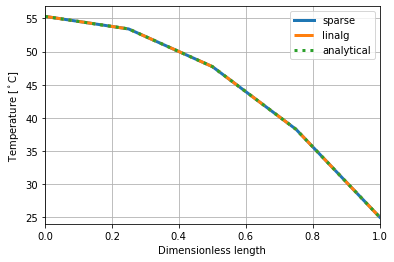

In [2]:
#%matplotlib inline
import numpy as np
import scipy as sc
import scipy.sparse.linalg
from numpy.linalg import solve
import matplotlib.pyplot as plt

# Set simulation parameters
h = 0.25              # element size
L = 1.0              # length of domain
n = int(round(L/h))  # number of unknowns 
x=np.arange(n+1)*h   # includes right bc 
T1=25
sigma = 100*L**2/1.65

def tri_diag(a, b, c, k1=-1, k2=0, k3=1):
    """ a,b,c diagonal terms """
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def analytical(sigma,x):
    return sigma*(1-x*x)/2+T1

#Create matrix for linalg solver
a=np.ones(n-1)
b=-np.ones(n)*2
c=np.ones(n-1)
#Create matrix for sparse solver
diagonals=np.zeros((3,n))
diagonals[0,:]= 1
diagonals[1,:]= -2  
diagonals[2,:]= 1

# rhs vector
d=np.repeat(-h*h*sigma,n)

#----boundary conditions ------
#lhs - no flux of heat
diagonals[2,1]= 2
c[0]=2
#rhs - constant temperature
d[n-1]=d[n-1]-T1
#------------------------------

A=tri_diag(a,b,c)
A_sparse = sc.sparse.spdiags(diagonals, [-1,0,1], n, n,format='csc') 

#Solve linear problems
Ta = solve(A,d,)
Tb = sc.sparse.linalg.spsolve(A_sparse,d)
#Add right boundary node
Ta=np.append(Ta,T1)
Tb=np.append(Tb,T1)
#uncomment to test efficiency
%timeit sc.sparse.linalg.spsolve(A_sparse,d)
%timeit solve(A,d,)

# Plot solutions
plt.plot(x,Ta,x,Tb,'-.',x,analytical(sigma,x),':', lw=3)
plt.xlabel("Dimensionless length")
plt.ylabel(r"Temperature [$^\circ$C]")
plt.xlim(0,1)
plt.ylim(T1-1)
plt.legend(['sparse','linalg','analytical'])
plt.grid()
plt.show()

In [18]:
Ta

array([55.3030303 , 53.40909091, 47.72727273, 38.25757576, 25.        ])

<!-- --- end solution of exercise --- -->

<!-- --- end exercise --- -->